<a href="https://colab.research.google.com/github/thekonang/ML_Final_Project/blob/main/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Assessment in African Markets

## Table of Contents
1. [Project Overview](#1)
2. [Environment Setup](#2)
3. [EDA - Exploratory Data Analysis](#3)
4. [Preliminary Data Analysis](#4)
5. [Feature Engineering (Merged Dataset)](#5)
6. [Feature Engineering (Primary Dataset)](#5)
7. [Model Training and Evaluation](#6)
8. [Prediction and Submission](#7)


## <a id="1"></a>Project Overview

This project aims to develop a machine learning model for predicting credit risk in African markets. The core objectives include:

- Loading and comprehending the credit scoring dataset.
- Conducting exploratory data analysis to understand the data characteristics.
- Developing and evaluating a suitable machine learning model.
- Generating predictions for submission.

Key considerations in this project:

- Addressing the inherent class imbalance in credit default data.
- Building a robust model that can generalize effectively to new regions within the African market.

# [Environment Setup](#2)

In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
import tensorflow as tf  # For deep learning models
from tensorflow import keras  # For building Keras models
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 83.2 MB/s eta 0:00:00


In [ ]:
train = pd.read_csv('Train.csv')
train.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [ ]:
test = pd.read_csv('Test.csv')
test.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


# [EDA - Exploratory Data Analysis](#4)

### Check for missing values in the training data

In [ ]:
missing_values = train.isnull().sum()
missing_values

,0
ID,0
customer_id,1
country_id,1
tbl_loan_id,1
lender_id,1
loan_type,1
Total_Amount,1
Total_Amount_to_Repay,1
disbursement_date,1
due_date,1


### Inspection of the training dataset's structure and data types

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           32770 non-null  object 
 1   customer_id                  32769 non-null  float64
 2   country_id                   32769 non-null  object 
 3   tbl_loan_id                  32769 non-null  float64
 4   lender_id                    32769 non-null  float64
 5   loan_type                    32769 non-null  object 
 6   Total_Amount                 32769 non-null  float64
 7   Total_Amount_to_Repay        32769 non-null  float64
 8   disbursement_date            32769 non-null  object 
 9   due_date                     32769 non-null  object 
 10  duration                     32769 non-null  float64
 11  New_versus_Repeat            32769 non-null  object 
 12  Amount_Funded_By_Lender      32769 non-null  float64
 13  Lender_portion_F

### Calculate descriptive statistics for loan duration by loan type

In [ ]:
loan_duration_summary = train.groupby('loan_type')['duration'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
loan_duration_summary

,loan_type,mean,median,std,min,max
0,Type_1,7.000000,7.0,0.000000,7.0,7.0
1,Type_10,30.789474,29.0,16.929485,1.0,180.0
2,Type_11,30.000000,30.0,0.000000,30.0,30.0
3,Type_12,11.666667,14.0,3.500000,7.0,14.0
4,Type_13,30.000000,30.0,0.000000,30.0,30.0
5,Type_14,30.000000,30.0,0.000000,30.0,30.0
6,Type_16,12.250000,14.0,3.500000,7.0,14.0
7,Type_17,7.000000,7.0,0.000000,7.0,7.0
8,Type_18,30.000000,30.0,0.000000,30.0,30.0
9,Type_19,1034.666667,1096.0,106.232450,912.0,1096.0


### Visualizations

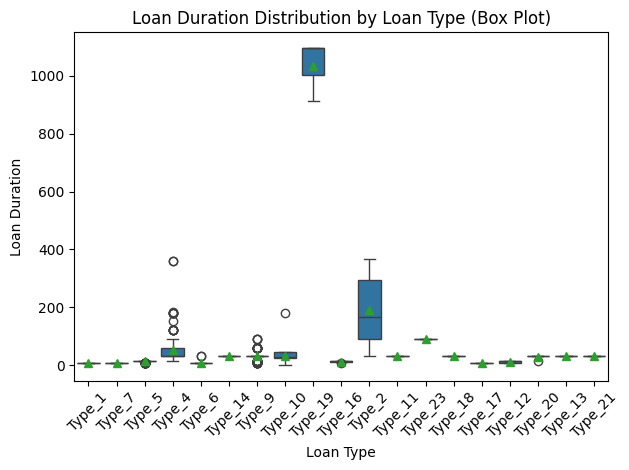

<ipython-input-8-b4803648fcf0>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Loan Type")  # Add legend with a title


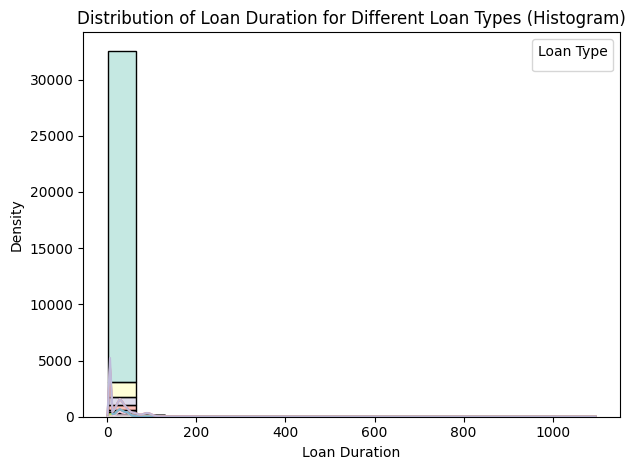

In [ ]:
# Generate a boxplot to compare loan duration across different loan types
sns.boxplot(
    data=train,
    x="loan_type",
    y="duration",
    showmeans=True,  # Add means to the boxplot for better comparison
)
plt.title("Loan Duration Distribution by Loan Type (Box Plot)")
plt.xlabel("Loan Type")
plt.ylabel("Loan Duration")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing for better visualization
plt.show()

# Create a histogram to explore the distribution of loan duration within each loan type
sns.histplot(
    data=train,
    x="duration",
    hue="loan_type",
    multiple="stack",
    kde=True,
    palette="Set3",  # Use a color palette for better distinction
)
plt.title("Distribution of Loan Duration for Different Loan Types (Histogram)")
plt.xlabel("Loan Duration")
plt.ylabel("Density")
plt.legend(title="Loan Type")  # Add legend with a title
plt.tight_layout()
plt.show()

# [Feature Engineering (Merged Dataset)](#5)

In [ ]:
# Assume train_data is the preprocessed train dataset
# Load the economic indicators dataset
economic_indicators = pd.read_csv("economic_indicators.csv")  # Replace with your actual file path

# Step 3: Align the country identifiers (if needed)
# Rename 'country_id' in train dataset to 'country' if necessary
economic_indicators.rename(columns={'Country': 'country_id'}, inplace=True)

# Step 1: Reshape the economic indicators dataset (melt operation)
indicator_columns = [col for col in economic_indicators.columns if col not in ['Country']]
economic_indicators_long = economic_indicators.melt(
    id_vars='country_id',
    value_vars=indicator_columns,
    var_name='year',
    value_name='indicator_value'
)

# Extract the year from the column names and convert to numeric
economic_indicators_long['year'] = economic_indicators_long['year'].str.extract('(\d+)').fillna(0).astype(int)

# Pivot the long dataframe to get one row per country-year
# Change 'variable' to the actual column name in your melted DataFrame
economic_indicators_processed = economic_indicators_long.pivot_table(
    index=['country_id', 'year'],
    columns='indicator_value',  # Changed from 'variable' to 'indicator_value'
    values='indicator_value' # Changed from 'indicator_value' to 'value'
).reset_index()
display(economic_indicators_processed.head())
# Step 2: Extract 'year' from the preprocessed train dataset's disbursement_date
train['year'] = pd.to_datetime(train['disbursement_date']).dt.year

# Step 4: Merge train dataset with the processed economic indicators
merged_train_data = pd.merge(
    train,
    economic_indicators_processed,
    on=['country_id', 'year'],
    how='left'  # Left join to retain all rows from the train dataset
)

# Display the first few rows of the merged dataset
display(merged_train_data.head())

# Step 5: Save the merged dataset for further use
merged_train = merged_train_data.to_csv("merged_train_data.csv", index=False)

indicator_value,country_id,year
0,Cote d'Ivoire,0
1,Cote d'Ivoire,2001
2,Cote d'Ivoire,2002
3,Cote d'Ivoire,2003
4,Cote d'Ivoire,2004


,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target,year
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0,2022
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0,2022
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0,2024
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0,2022
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0,2022


In [ ]:
def process_loan_duration_features_on_merged_dataset(merged_train_data, test):
    # Combine train and test datasets
    data = pd.concat([train, test]).reset_index(drop=True)

    # Convert the datetime columns appropriately
    date_cols = ['disbursement_date', 'due_date']
    for col in date_cols:
        # Use infer_datetime_format=True or specify the correct format
        data[col] = pd.to_datetime(data[col], infer_datetime_format=True, errors='coerce')
        # Extract month, day, and year from the date columns
        data[col + '_month'] = data[col].dt.month
        data[col + '_day'] = data[col].dt.day
        data[col + '_year'] = data[col].dt.year

    # Default rate by loan_type
    loan_type_default_rate = data.groupby('loan_type')['target'].mean()
    print("Loan Type Default Rates:")
    print(loan_type_default_rate)

    # Combine duration bins with loan_type
    data['duration_bin'] = pd.cut(
        data['duration'],
        bins=[0, 7, 30, 60, 90, float('inf')],
        labels=['0-7', '8-30', '31-60', '61-90', '90+']
    )
    pivot_table = data.pivot_table(values='target', index='duration_bin', columns='loan_type', aggfunc='mean')
    print("Pivot Table (Default Rates by Duration Bin and Loan Type):")
    print(pivot_table)

    # Map average duration by loan type
    loan_type_duration_map = {
        'Type_1': 7, 'Type_10': 30.36, 'Type_11': 30, 'Type_12': 12.25, 'Type_13': 30,
        'Type_14': 30, 'Type_16': 10.5, 'Type_17': 7, 'Type_18': 30, 'Type_19': 1004,
        'Type_2': 178.45, 'Type_20': 30, 'Type_21': 30, 'Type_23': 90, 'Type_4': 53.69,
        'Type_5': 13.71, 'Type_6': 7.22, 'Type_7': 7, 'Type_9': 31.6
    }
    data['avg_duration_by_type'] = data['loan_type'].map(loan_type_duration_map)

    # Calculate duration deviation
    data['duration_deviation'] = data['duration'] - data['avg_duration_by_type']

    # Categorize loan types by duration
    def categorize_loan_type_duration(loan_type):
        short_term = ['Type_1', 'Type_7', 'Type_17', 'Type_5', 'Type_6']
        medium_term = ['Type_10', 'Type_11', 'Type_13', 'Type_14', 'Type_20', 'Type_18', 'Type_21']
        long_term = ['Type_2', 'Type_4', 'Type_9']
        very_long_term = ['Type_19']

        if loan_type in short_term:
            return 'short_term'
        elif loan_type in medium_term:
            return 'medium_term'
        elif loan_type in long_term:
            return 'long_term'
        elif loan_type in very_long_term:
            return 'very_long_term'
        else:
            return 'unknown'

    data['loan_duration_category'] = data['loan_type'].apply(categorize_loan_type_duration)

    # Encode loan duration category
    le = LabelEncoder()
    data['loan_duration_category_encoded'] = le.fit_transform(data['loan_duration_category'])

    # Create fixed duration flag
    fixed_duration_types = ['Type_1', 'Type_7', 'Type_17', 'Type_11', 'Type_13', 'Type_14', 'Type_18']
    data['is_fixed_duration'] = data['loan_type'].isin(fixed_duration_types).astype(int)

    # Feature Engineering using the already existing features
    # 1. Loan-to-Repayment Ratio
    data['loan_to_repayment_ratio'] = data['Total_Amount_to_Repay'] / data['Total_Amount']

    # 2. Lender Portion Utilization
    data['lender_utilization_ratio'] = data['Amount_Funded_By_Lender'] / data['Total_Amount']

    # 3. Borrower Contribution Ratio
    data['borrower_contribution_ratio'] = 1 - data['lender_utilization_ratio']

    # 4. Repeat Borrower Flag (Binary encoding for 'New_versus_Repeat')
    data['is_repeat_borrower'] = data['New_versus_Repeat'].apply(lambda x: 1 if x == 'Repeat' else 0)

    # 5. Country-level features
    # Country-level features
    if 'target' in data.columns:  # During training
        # Compute country-level aggregation using training data
        country_agg = train.groupby('country_id').agg({
            'Total_Amount': 'mean',
            'target': 'mean'  # Default rate by country
        }).rename(columns={
            'target': 'default_rate_by_country',
            'Total_Amount': 'mean_Total_Amount'
        })
        # Merge into training data
        merged_train_data = merged_train_data.merge(country_agg, on='country_id', how='left')
        # Store the country_agg table for later use
        precomputed_country_agg = country_agg.drop(columns=['default_rate_by_country'])

    else:  # During testing
        # Use precomputed values from training for test data
        test = test.merge(precomputed_country_agg, on='country_id', how='left')


    # 6. Repayment-to-Lender Portion Ratio
    data['repayment_to_lender_ratio'] = data['Lender_portion_to_be_repaid'] / data['Amount_Funded_By_Lender']

    # 7. Loan Efficiency Score
    data['loan_efficiency'] = data['Lender_portion_to_be_repaid'] / data['Total_Amount_to_Repay']

    # 8.
    data['borrower_contribution_effect'] = data['borrower_contribution_ratio'] * data['Total_Amount']

    # 9.
    data['loan_history_score'] = data['New_versus_Repeat'] * data['is_repeat_borrower']

    # 10.
    data['duration_effect'] = data['duration_bin'].cat.codes * data['loan_duration_category_encoded']

    # 11.
    data['repayment_funding_interaction'] = data['repayment_to_lender_ratio'] / (data['loan_to_repayment_ratio'] + 1e-8)  # Avoid division by zero

    # Select all categorical columns from the dataset and label encode them or one hot encode
    cat_cols = data.select_dtypes(include='object').columns
    for col in cat_cols:
        data[col] = le.fit_transform(data[col].astype(str))

#------------------------------------------

    # Select only numerical columns for isinf check
    numerical_data = data.select_dtypes(include=np.number)

    max_float32 = np.finfo(np.float32).max
    # Apply isinf check and replacement only to numerical columns
    numerical_data[np.isinf(numerical_data)] = max_float32

    # Update the original DataFrame with the modified numerical columns
    data[numerical_data.columns] = numerical_data

# -----------------------------------------

    # Filling the missing values
    data.fillna(method='ffill', inplace=True)

    # Return processed train and test sets
    train_processed = data.iloc[:len(train)]
    test_processed = data.iloc[len(train):]

    return train_processed, test_processed


In [ ]:
train, test = process_loan_duration_features_on_merged_dataset(merged_train_data, test)

<ipython-input-6-74172b3e3ad8>:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[col] = pd.to_datetime(data[col], infer_datetime_format=True, errors='coerce')
<ipython-input-6-74172b3e3ad8>:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[col] = pd.to_datetime(data[col], infer_datetime_format=True, errors='coerce')
<ipython-input-6-74172b3e3ad8>:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current be

Loan Type Default Rates:
loan_type
Type_1     0.008425
Type_10    0.025751
Type_11    0.047619
Type_12    0.047619
Type_13    0.000000
Type_14    0.717172
Type_15    0.750000
Type_16    0.000000
Type_17    0.000000
Type_18    0.033333
Type_19    0.000000
Type_2     0.608108
Type_20    0.538462
Type_21    0.000000
Type_22    0.000000
Type_23    0.722222
Type_24    0.000000
Type_3          NaN
Type_4     0.123077
Type_5     0.080210
Type_6     0.106443
Type_7     0.084229
Type_8          NaN
Type_9     0.175610
Name: target, dtype: float64
Pivot Table (Default Rates by Duration Bin and Loan Type):
loan_type       Type_1   Type_10   Type_11   Type_12  Type_13   Type_14  \
duration_bin                                                              
0-7           0.008425  0.000000       NaN  0.000000      NaN       NaN   
8-30               NaN  0.009009  0.047619  0.055556      0.0  0.717172   
31-60              NaN  0.057803       NaN       NaN      NaN       NaN   
61-90              NaN

<ipython-input-6-74172b3e3ad8>:142: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
train.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,loan_to_repayment_ratio,lender_utilization_ratio,borrower_contribution_ratio,is_repeat_borrower,repayment_to_lender_ratio,loan_efficiency,borrower_contribution_effect,loan_history_score,duration_effect,repayment_funding_interaction
0,71539,266671,1,248032,267278,0,8448.0,8448.0,2022-08-30,2022-09-06,...,1.000000,0.014305,0.985695,0,1.001241,0.014323,8327.15,0,0,1.001241
1,20157,248919,1,228515,267278,0,25895.0,25979.0,2022-07-30,2022-08-06,...,1.003244,0.300000,0.700000,0,1.003282,0.300012,18126.50,0,0,1.000038
2,84490,308486,1,370501,251804,21,6900.0,7142.0,2024-09-06,2024-09-13,...,1.035072,0.200000,0.800000,0,1.034783,0.199944,5520.00,0,0,0.999720
3,69968,266004,1,285009,267278,0,8958.0,9233.0,2022-10-20,2022-10-27,...,1.030699,0.300000,0.700000,0,1.030736,0.300011,6270.60,0,0,1.000036
4,36345,253803,1,305312,267278,0,4564.0,4728.0,2022-11-28,2022-12-05,...,1.035933,0.300000,0.700000,0,1.035641,0.299915,3194.80,0,0,0.999718


# [Feature Engineering (Primary Dataset)](#5)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def process_loan_duration_features(train, test):
    # Combine train and test datasets
    data = pd.concat([train, test]).reset_index(drop=True)

    # Convert the datetime columns appropriately
    date_cols = ['disbursement_date', 'due_date']
    for col in date_cols:
        # Use infer_datetime_format=True or specify the correct format
        data[col] = pd.to_datetime(data[col], infer_datetime_format=True, errors='coerce')
        # Extract month, day, and year from the date columns
        data[col + '_month'] = data[col].dt.month
        data[col + '_day'] = data[col].dt.day
        data[col + '_year'] = data[col].dt.year

    # Default rate by loan_type
    loan_type_default_rate = data.groupby('loan_type')['target'].mean()
    print("Loan Type Default Rates:")
    print(loan_type_default_rate)

    # Combine duration bins with loan_type
    data['duration_bin'] = pd.cut(
        data['duration'],
        bins=[0, 7, 30, 60, 90, float('inf')],
        labels=['0-7', '8-30', '31-60', '61-90', '90+']
    )
    pivot_table = data.pivot_table(values='target', index='duration_bin', columns='loan_type', aggfunc='mean')
    print("Pivot Table (Default Rates by Duration Bin and Loan Type):")
    print(pivot_table)

    # Map average duration by loan type
    loan_type_duration_map = {
        'Type_1': 7, 'Type_10': 30.36, 'Type_11': 30, 'Type_12': 12.25, 'Type_13': 30,
        'Type_14': 30, 'Type_16': 10.5, 'Type_17': 7, 'Type_18': 30, 'Type_19': 1004,
        'Type_2': 178.45, 'Type_20': 30, 'Type_21': 30, 'Type_23': 90, 'Type_4': 53.69,
        'Type_5': 13.71, 'Type_6': 7.22, 'Type_7': 7, 'Type_9': 31.6
    }
    data['avg_duration_by_type'] = data['loan_type'].map(loan_type_duration_map)

    # Calculate duration deviation
    data['duration_deviation'] = data['duration'] - data['avg_duration_by_type']

    # Categorize loan types by duration
    def categorize_loan_type_duration(loan_type):
        short_term = ['Type_1', 'Type_7', 'Type_17', 'Type_5', 'Type_6']
        medium_term = ['Type_10', 'Type_11', 'Type_13', 'Type_14', 'Type_20', 'Type_18', 'Type_21']
        long_term = ['Type_2', 'Type_4', 'Type_9']
        very_long_term = ['Type_19']

        if loan_type in short_term:
            return 'short_term'
        elif loan_type in medium_term:
            return 'medium_term'
        elif loan_type in long_term:
            return 'long_term'
        elif loan_type in very_long_term:
            return 'very_long_term'
        else:
            return 'unknown'

    data['loan_duration_category'] = data['loan_type'].apply(categorize_loan_type_duration)

    # Encode loan duration category
    le = LabelEncoder()
    data['loan_duration_category_encoded'] = le.fit_transform(data['loan_duration_category'])

    # Create fixed duration flag
    fixed_duration_types = ['Type_1', 'Type_7', 'Type_17', 'Type_11', 'Type_13', 'Type_14', 'Type_18']
    data['is_fixed_duration'] = data['loan_type'].isin(fixed_duration_types).astype(int)

    # Feature Engineering using the already existing features
    # 1. Loan-to-Repayment Ratio
    data['loan_to_repayment_ratio'] = data['Total_Amount_to_Repay'] / data['Total_Amount']

    # 2. Lender Portion Utilization
    data['lender_utilization_ratio'] = data['Amount_Funded_By_Lender'] / data['Total_Amount']

    # 3. Borrower Contribution Ratio
    data['borrower_contribution_ratio'] = 1 - data['lender_utilization_ratio']

    # 4. Repeat Borrower Flag (Binary encoding for 'New_versus_Repeat')
    data['is_repeat_borrower'] = data['New_versus_Repeat'].apply(lambda x: 1 if x == 'Repeat' else 0)

    # 5. Country-level features
    # Country-level features
    if 'target' in data.columns:  # During training
        # Compute country-level aggregation using training data
        country_agg = train.groupby('country_id').agg({
            'Total_Amount': 'mean',
            'target': 'mean'  # Default rate by country
        }).rename(columns={
            'target': 'default_rate_by_country',
            'Total_Amount': 'mean_Total_Amount'
        })
        # Merge into training data
        train = train.merge(country_agg, on='country_id', how='left')
        # Store the country_agg table for later use
        precomputed_country_agg = country_agg.drop(columns=['default_rate_by_country'])

    else:  # During testing
        # Use precomputed values from training for test data
        test = test.merge(precomputed_country_agg, on='country_id', how='left')


    # 6. Repayment-to-Lender Portion Ratio
    data['repayment_to_lender_ratio'] = data['Lender_portion_to_be_repaid'] / data['Amount_Funded_By_Lender']

    # 7. Loan Efficiency Score
    data['loan_efficiency'] = data['Lender_portion_to_be_repaid'] / data['Total_Amount_to_Repay']

    # 8.
    data['borrower_contribution_effect'] = data['borrower_contribution_ratio'] * data['Total_Amount']

    # 9.
    data['loan_history_score'] = data['New_versus_Repeat'] * data['is_repeat_borrower']

    # 10.
    data['duration_effect'] = data['duration_bin'].cat.codes * data['loan_duration_category_encoded']

    # 11.
    data['repayment_funding_interaction'] = data['repayment_to_lender_ratio'] / (data['loan_to_repayment_ratio'] + 1e-8)  # Avoid division by zero

    # Select all categorical columns from the dataset and label encode them or one hot encode
    cat_cols = data.select_dtypes(include='object').columns
    for col in cat_cols:
        data[col] = le.fit_transform(data[col].astype(str))

#------------------------------------------

    # Select only numerical columns for isinf check
    numerical_data = data.select_dtypes(include=np.number)

    max_float32 = np.finfo(np.float32).max
    # Apply isinf check and replacement only to numerical columns
    numerical_data[np.isinf(numerical_data)] = max_float32

    # Update the original DataFrame with the modified numerical columns
    data[numerical_data.columns] = numerical_data

# -----------------------------------------

    # Filling the missing values
    data.fillna(method='ffill', inplace=True)

    # Return processed train and test sets
    train_processed = data.iloc[:len(train)]
    test_processed = data.iloc[len(train):]

    return train_processed, test_processed


In [ ]:
train, test = process_loan_duration_features(train, test)

<ipython-input-9-4f8fe6d027a1>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[col] = pd.to_datetime(data[col], infer_datetime_format=True, errors='coerce')
<ipython-input-9-4f8fe6d027a1>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[col] = pd.to_datetime(data[col], infer_datetime_format=True, errors='coerce')
<ipython-input-9-4f8fe6d027a1>:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current 

Loan Type Default Rates:
loan_type
0     0.006902
1     0.021352
2     0.035714
3     0.038462
4     0.000000
5     0.612069
6     0.600000
7     0.000000
8     0.000000
9     0.023810
10    0.000000
11    0.085227
12    0.500000
13    0.000000
14    0.000000
15    0.541667
16    0.000000
17    0.000000
18    0.102151
19    0.067070
20    0.083516
21    0.069486
22    0.000000
23    0.145749
Name: target, dtype: float64
Pivot Table (Default Rates by Duration Bin and Loan Type):
loan_type           0         1         2         3    4         5    6    7   \
duration_bin                                                                    
0-7           0.006902  0.000000       NaN  0.000000  NaN       NaN  NaN  0.0   
8-30               NaN  0.007299  0.035714  0.047619  0.0  0.612069  NaN  0.0   
31-60              NaN  0.050505       NaN       NaN  NaN       NaN  NaN  NaN   
61-90              NaN       NaN       NaN       NaN  NaN       NaN  NaN  NaN   
90+                NaN  0.00000

<ipython-input-9-4f8fe6d027a1>:145: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
print (train.head())

      ID  customer_id  country_id  tbl_loan_id  lender_id  loan_type  \
0  71539       266671           1       248032     267278          0   
1  20157       248919           1       228515     267278          0   
2  84490       308486           1       370501     251804         21   
3  69968       266004           1       285009     267278          0   
4  36345       253803           1       305312     267278          0   

   Total_Amount  Total_Amount_to_Repay disbursement_date   due_date  ...  \
0        8448.0                 8448.0        2022-08-30 2022-09-06  ...   
1       25895.0                25979.0        2022-07-30 2022-08-06  ...   
2        6900.0                 7142.0        2024-09-06 2024-09-13  ...   
3        8958.0                 9233.0        2022-10-20 2022-10-27  ...   
4        4564.0                 4728.0        2022-11-28 2022-12-05  ...   

   loan_to_repayment_ratio  lender_utilization_ratio  \
0                 1.000000                  0.014305  

# [Model Training and Evaluation](#6)

In [ ]:
# Scaling the necessary columns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()

train[['Total_Amount', 'Total_Amount_to_Repay', 'Amount_Funded_By_Lender',
          'Lender_portion_Funded', 'Lender_portion_to_be_repaid']] = scaler.fit_transform(train[['Total_Amount', 'Total_Amount_to_Repay', 'Amount_Funded_By_Lender',
                                                                                                'Lender_portion_Funded', 'Lender_portion_to_be_repaid']])

test[['Total_Amount', 'Total_Amount_to_Repay', 'Amount_Funded_By_Lender',
          'Lender_portion_Funded', 'Lender_portion_to_be_repaid']] = scaler.fit_transform(test[['Total_Amount', 'Total_Amount_to_Repay', 'Amount_Funded_By_Lender',
                                                                                                'Lender_portion_Funded', 'Lender_portion_to_be_repaid']])

In [ ]:
train.head(5)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,loan_to_repayment_ratio,lender_utilization_ratio,borrower_contribution_ratio,is_repeat_borrower,repayment_to_lender_ratio,loan_efficiency,borrower_contribution_effect,loan_history_score,duration_effect,repayment_funding_interaction
0,40799,266671.0,1,248032.0,267278.0,0,0.002111,0.001837,2022-08-30,2022-09-06,...,1.000000,0.014305,0.985695,0,1.001241,0.014323,8327.15,0,0,1.001241
1,11478,248919.0,1,228515.0,267278.0,0,0.006473,0.005648,2022-07-30,2022-08-06,...,1.003244,0.300000,0.700000,0,1.003282,0.300012,18126.50,0,0,1.000038
2,49784,308486.0,1,370501.0,251804.0,21,0.001724,0.001553,2024-09-06,2024-09-13,...,1.035072,0.200000,0.800000,0,1.034783,0.199944,5520.00,0,0,0.999720
3,39930,266004.0,1,285009.0,267278.0,0,0.002238,0.002007,2022-10-20,2022-10-27,...,1.030699,0.300000,0.700000,0,1.030736,0.300011,6270.60,0,0,1.000036
4,20695,253803.0,1,305312.0,267278.0,0,0.001140,0.001028,2022-11-28,2022-12-05,...,1.035933,0.300000,0.700000,0,1.035641,0.299915,3194.80,0,0,0.999718


In [ ]:
 # dropping unsed columns
train.drop(columns=['ID', 'customer_id',	'country_id',	'tbl_loan_id',	'lender_id', 'duration_bin',
                       'loan_duration_category', 'disbursement_date', 'due_date','loan_type', 'due_date_day', 'avg_duration_by_type',
                    'duration_deviation', 'loan_duration_category_encoded', 'is_fixed_duration', 'is_repeat_borrower'],  # dropped this column because they had no effect on the target
                    inplace=True)

 # dropping unsed columns
test.drop(columns=['ID', 'customer_id',	'country_id',	'tbl_loan_id',	'lender_id', 'duration_bin',
                       'loan_duration_category', 'disbursement_date', 'due_date', 'loan_type', 'due_date_day', 'avg_duration_by_type',
                   'duration_deviation', 'loan_duration_category_encoded', 'is_fixed_duration', 'is_repeat_borrower'],
                    inplace=True)

**Using the main dataset for model training**

You can also experiment with the merged dataset (i.e. the economic indication and the main dataset)




In [ ]:
# Assuming 'target' is your target variable and the rest are features
# Select features (all columns except 'target')
features = train.drop(columns=['target'])

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    features,  # Features for prediction
    train['target'],  # Target variable
    shuffle=True,
    test_size=0.25,
    random_state=42
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score

# Initialize and train Random Forest
rf_model = RandomForestClassifier(
                              n_estimators=100,
                               #class_weight="balanced",
                              n_jobs=-1,
                              max_depth=20,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features='sqrt'
                              )

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_valid)
y_pred_proba = rf_model.predict_proba(X_valid)[:, 1]  # Probability of class 1

# Evaluation Metrics
accuracy = accuracy_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
f1 = f1_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, target_names=['Paid', 'Defaulted'])

# Display Results
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.7f}")
print(f"F1 Score: {f1:.7f}")
print("\nClassification Report:")
print(report)


Validation Accuracy: 0.9948
ROC AUC Score: 0.9827421
F1 Score: 0.8590164

Classification Report:
              precision    recall  f1-score   support

        Paid       1.00      1.00      1.00      8029
   Defaulted       0.93      0.80      0.86       164

    accuracy                           0.99      8193
   macro avg       0.96      0.90      0.93      8193
weighted avg       0.99      0.99      0.99      8193



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)  # This line is crucial

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_valid)
y_pred_proba = best_model.predict_proba(X_valid)[:, 1]  # Probability of class 1

# Evaluation Metrics
accuracy = accuracy_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
f1 = f1_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, target_names=['Paid', 'Defaulted'])

# Display Results
print("Best Parameters:", grid_search.best_params_)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Validation Accuracy: 0.9938
ROC AUC Score: 0.9838

Classification Report:
              precision    recall  f1-score   support

        Paid       1.00      1.00      1.00      8029
   Defaulted       0.91      0.77      0.83       164

    accuracy                           0.99      8193
   macro avg       0.95      0.88      0.91      8193
weighted avg       0.99      0.99      0.99      8193



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score

#cat_features = ['loan_type', 'duration_bin']

# Initialize the CatBoostClassifier
cat_model = CatBoostClassifier(
    iterations=500,  # Number of boosting iterations
    learning_rate=0.05,  # Learning rate
    depth=8,  # Depth of the tree
    loss_function='Logloss',  # Binary classification loss function
    eval_metric='AUC',  # Metric to evaluate the model
    random_seed=42,
    #cat_features=cat_features,  # List of categorical feature indices
    verbose=100  # Print updates every 100 iterations
)

# Train the model
cat_model.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid),  # Validation set for evaluation
    use_best_model=True,  # Use the best iteration based on validation metrics
    early_stopping_rounds=30  # Stop early if no improvement over 50 iterations
)

# Make predictions
y_pred = cat_model.predict(X_valid)
y_pred_proba = cat_model.predict_proba(X_valid)[:, 1]  # Probability of class 1

# Evaluation Metrics
accuracy = accuracy_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
report = classification_report(y_valid, y_pred, target_names=['Paid', 'Defaulted'])

# Display Results
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.7f}")
print(f"F1 Score: {f1:.7f}")
print("\nClassification Report:")
print(report)

# Feature Importance (Optional)
feature_importances = cat_model.get_feature_importance(prettified=True)
print("Feature Importances:")
print(feature_importances)


0:	test: 0.9694742	best: 0.9694742 (0)	total: 54.4ms	remaining: 27.2s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.9872493461
bestIteration = 20

Shrink model to first 21 iterations.
Validation Accuracy: 0.9926
ROC AUC Score: 0.9872493
F1 Score: 0.8316832

Classification Report:
              precision    recall  f1-score   support

        Paid       0.99      1.00      1.00      8029
   Defaulted       0.93      0.68      0.79       164

    accuracy                           0.99      8193
   macro avg       0.96      0.84      0.89      8193
weighted avg       0.99      0.99      0.99      8193

Feature Importances:
                       Feature Id  Importances
0       repayment_to_lender_ratio    23.617525
1         loan_to_repayment_ratio    22.982387
2                            year     8.026315
3          disbursement_date_year     5.734503
4                  due_date_month     5.603597
5        lender_utilization_ratio     5.134482
6                   

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.4 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score

# Initialize and train XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,         # Number of boosting rounds
    max_depth=8,              # Maximum tree depth
    learning_rate=0.01,        # Learning rate
    objective='binary:logistic',  # Binary classification
    eval_metric='auc',        # Evaluation metric
    use_label_encoder=False,  # Suppress label encoding warning
    random_state=42           # For reproducibility
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_valid)
y_pred_proba = xgb_model.predict_proba(X_valid)[:, 1]  # Probability of class 1

# Evaluation Metrics
accuracy = accuracy_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
f1 = f1_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred, target_names=['Paid', 'Defaulted'])

# Display Results
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.7f}")
print(f"F1 Score: {f1:.7f}")
print("\nClassification Report:")
print(report)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:49:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.9926
ROC AUC Score: 0.9817593
F1 Score: 0.7765568

Classification Report:
              precision    recall  f1-score   support

        Paid       0.99      1.00      1.00      8029
   Defaulted       0.97      0.65      0.78       164

    accuracy                           0.99      8193
   macro avg       0.98      0.82      0.89      8193
weighted avg       0.99      0.99      0.99      8193



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold
import numpy as np

# Initialize StratifiedKFold instead of StratifiedGroupKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the XGBoost Classifier (rest of the code remains the same)
xgb_model_skf = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Lists to store fold results (rest of the code remains the same)
fold_accuracies = []
fold_roc_aucs = []

# Perform StratifiedKFold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):  # Use skf.split
    print(f"\nFold {fold + 1}")

    # Split data into training and validation sets for this fold (rest of the code remains the same)
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Train the model for this fold
    xgb_model_skf.fit(X_train_fold, y_train_fold)

    # Make predictions for this fold
    y_pred_fold = xgb_model_skf.predict(X_val_fold)
    y_pred_proba_fold = xgb_model_skf.predict_proba(X_val_fold)[:, 1]

    # Calculate metrics for this fold
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    roc_auc_fold = roc_auc_score(y_val_fold, y_pred_proba_fold)
    f1_fold = f1_score(y_val_fold, y_pred_fold)
    report_fold = classification_report(y_val_fold, y_pred_fold, target_names=['Paid', 'Defaulted'])

    fold_accuracies.append(accuracy_fold)
    fold_roc_aucs.append(roc_auc_fold)

    print(f"Fold {fold + 1} Accuracy: {accuracy_fold:.4f}")
    print(f"Fold {fold + 1} ROC AUC: {roc_auc_fold:.7f}")
    print(f"Fold {fold + 1} F1 Score: {f1_fold:.7f}")
    print(f"Fold {fold + 1} Classification Report:")
    print(report_fold)

# Display overall results
print("\nOverall Results:")
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Average ROC AUC: {np.mean(fold_roc_aucs):.7f} ± {np.std(fold_roc_aucs):.7f}")
print(f"Average F1 Score: {np.mean([f1_score(y_valid, xgb_model_skf.predict(X_valid)) for _ in range(skf.n_splits)]):.7f}")



Fold 1


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:39:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Accuracy: 0.9949
Fold 1 ROC AUC: 0.9931363
Fold 1 F1 Score: 0.8547945
Fold 1 Classification Report:
              precision    recall  f1-score   support

        Paid       1.00      1.00      1.00     10107
   Defaulted       0.90      0.82      0.85       191

    accuracy                           0.99     10298
   macro avg       0.95      0.91      0.93     10298
weighted avg       0.99      0.99      0.99     10298


Fold 2


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:39:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Accuracy: 0.9955
Fold 2 ROC AUC: 0.9946779
Fold 2 F1 Score: 0.8763441
Fold 2 Classification Report:
              precision    recall  f1-score   support

        Paid       1.00      1.00      1.00     10107
   Defaulted       0.90      0.85      0.88       191

    accuracy                           1.00     10298
   macro avg       0.95      0.93      0.94     10298
weighted avg       1.00      1.00      1.00     10298


Fold 3


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:39:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 Accuracy: 0.9958
Fold 3 ROC AUC: 0.9986019
Fold 3 F1 Score: 0.8834688
Fold 3 Classification Report:
              precision    recall  f1-score   support

        Paid       1.00      1.00      1.00     10107
   Defaulted       0.92      0.85      0.88       191

    accuracy                           1.00     10298
   macro avg       0.96      0.93      0.94     10298
weighted avg       1.00      1.00      1.00     10298


Fold 4


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:39:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 Accuracy: 0.9964
Fold 4 ROC AUC: 0.9986583
Fold 4 F1 Score: 0.9023747
Fold 4 Classification Report:
              precision    recall  f1-score   support

        Paid       1.00      1.00      1.00     10107
   Defaulted       0.91      0.90      0.90       191

    accuracy                           1.00     10298
   macro avg       0.95      0.95      0.95     10298
weighted avg       1.00      1.00      1.00     10298


Fold 5


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:39:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 5 Accuracy: 0.9948
Fold 5 ROC AUC: 0.9989904
Fold 5 F1 Score: 0.8578947
Fold 5 Classification Report:
              precision    recall  f1-score   support

        Paid       1.00      1.00      1.00     10106
   Defaulted       0.87      0.85      0.86       192

    accuracy                           0.99     10298
   macro avg       0.93      0.92      0.93     10298
weighted avg       0.99      0.99      0.99     10298


Overall Results:
Average Accuracy: 0.9955 ± 0.0006
Average ROC AUC: 0.9968130 ± 0.0024258
Average F1 Score: 0.8610169


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'max_depth': [4, 6, 8],               # Maximum depth of the tree
    'learning_rate': [0.01, 0.05, 0.1],   # Learning rate
    'subsample': [0.8, 1.0],              # Subsample ratio of training instances
    'colsample_bytree': [0.8, 1.0],       # Subsample ratio of features
    'gamma': [0, 1, 5],                   # Minimum loss reduction for further partition
    'min_child_weight': [1, 5, 10],       # Minimum sum of instance weight needed for a child
    'reg_alpha': [0, 0.1, 1],             # L1 regularization strength
    'reg_lambda': [1, 2, 5]               # L2 regularization strength
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize based on AUC
    cv=3,               # 3-fold cross-validation
    verbose=2,
    n_jobs=-1           # Use all available cores
)

# Fit the model with training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
best_xgb = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb.predict(X_valid)
y_pred_proba = best_xgb.predict_proba(X_valid)[:, 1]  # Probability of class 1

# Evaluation Metrics
accuracy = accuracy_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
report = classification_report(y_valid, y_pred, target_names=['Paid', 'Defaulted'])

# Display Results
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.7f}")
print("\nClassification Report:")
print(report)


Fitting 3 folds for each of 8748 candidates, totalling 26244 fits


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize and train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=50,         # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    max_depth=3,              # Maximum tree depth
    min_samples_split=2,      # Minimum samples required to split an internal node
    min_samples_leaf=1,       # Minimum samples required to be a leaf node
    random_state=42           # For reproducibility
)

gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_valid)
y_pred_proba = gb_model.predict_proba(X_valid)[:, 1]  # Probability of class 1

# Evaluation Metrics
accuracy = accuracy_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
report = classification_report(y_valid, y_pred, target_names=['Paid', 'Defaulted'])

# Display Results
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.7f}")
print("\nClassification Report:")
print(report)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}

cat_model = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_seed=42, verbose=0)

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for AUC
    cv=3,  # 3-fold cross-validation
    verbose=3
)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best AUC Score:", grid_search.best_score_)


# [Prediction and Submission](#7)

In [ ]:
# Apply the wrangle function to the test data

if 'target' in test.columns:
        test = test.drop(columns=['target'])

# Predict probabilities
test_probs = rf_model.predict_proba(test)[:, 1]

# Apply custom threshold (e.g., 0.12)
threshold = 0.12
test_preds = (test_probs >= threshold).astype(int)

In [ ]:
# Assuming test_preds are your predictions
sub_file = pd.DataFrame({'ID': pd.read_csv('SampleSubmission.csv')['ID'], 'target': test_preds_xgb})
sub_file.to_csv('xgb(merged).csv', index=False)

In [ ]:
for i in test_probs:
  print ("{:.4f}".format(i))

Streaming output truncated to the last 5000 lines.
0.8000
0.0100
0.0600
0.0800
0.0000
0.0000
0.0200
0.0100
0.0400
0.0900
0.0800
0.0100
0.0300
0.0100
0.0700
0.0200
0.0200
0.0500
0.0500
0.0800
0.1100
0.0600
0.0000
0.0200
0.0600
0.0300
0.0300
0.0100
0.0400
0.0100
0.0100
0.0600
0.0800
0.0000
0.0000
0.0100
0.0700
0.0300
0.0700
0.0700
0.0600
0.0600
0.3500
0.0200
0.0800
0.1000
0.0300
0.0800
0.0400
0.0300
0.0000
0.0300
0.0000
0.0000
0.0400
0.0000
0.0100
0.1000
0.0600
0.0100
0.0500
0.0800
0.0400
0.0000
0.0400
0.0000
0.0800
0.0200
0.0500
0.0700
0.0900
0.0800
0.0700
0.0200
0.0300
0.0200
0.0900
0.0300
0.0200
0.1000
0.5900
0.9600
0.3200
0.0300
0.0800
0.5800
0.0700
0.1000
0.1000
0.0600
0.0000
0.0900
0.0100
0.0200
0.0000
0.0600
0.0400
0.0700
0.0700
0.0000
0.0200
0.0300
0.0200
0.0500
0.0800
0.0200
0.0700
0.0000
0.0100
0.0600
0.0800
0.0800
0.0700
0.0600
0.0000
0.0300
0.0000
0.0600
0.0600
0.0000
0.0100
0.0100
0.0000
0.1100
0.0000
0.1100
0.0400
0.0400
0.0000
0.1300
0.0500
0.8500
0.0700
0.0100
0.0100
0.01

In [ ]:
# Assuming test_preds are your predictions
sub_file = pd.DataFrame({'ID': pd.read_csv('SampleSubmission.csv')['ID'], 'target': test_preds})
sub_file.to_csv('rf_model(merged).csv', index=False)

In [ ]:
# Cat model
cat_model

# Apply the wrangle function to the test data

if 'target' in test.columns:
        test = test.drop(columns=['target'])

# Predict probabilities
test_probs = cat_model.predict_proba(test)[:, 1]

# Apply custom threshold (e.g., 0.12)
threshold = 0.12
test_preds = (test_probs >= threshold).astype(int)

# Assuming test_preds are your predictions
sub_file = pd.DataFrame({'ID': pd.read_csv('SampleSubmission.csv')['ID'], 'target': test_preds})
sub_file.to_csv('cat_model.csv', index=False)